# Enviornment Setting

In [2]:
!apt-get update
!apt-get install -y ffmpeg          # 產生 mp4 影片時常用
!pip uninstall -y gym gymnasium
!pip uninstall -y dopamine-rl
!pip install "gymnasium[classic_control]==0.28.1" stable-baselines3 --upgrade
!pip install stable-baselines3      # RL 演算法
!pip install imageio                # 影片處理
!pip install imageio_ffmpeg         # 影片處理


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [75.2 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,695 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Hit:13 https://ppa.launchpadcontent.net/gr

# Templates



In [ ]:
import gymnasium
import stable_baselines3

print("Gymnasium version:", gymnasium.__version__)
print("Stable Baselines3 version:", stable_baselines3.__version__)


Gymnasium version: 0.28.1
Stable Baselines3 version: 2.3.2


In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

import numpy as np
import os

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | 22       |
| time/              |          |
|    fps             | 1164     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
Training step 1000: Mean reward = 108.4 ± 35.395479937415736
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.6     |
|    ep_rew_mean     | 29.6     |
| time/              |          |
|    fps             | 1171     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
Training step 2000: Mean reward = 144.0 ± 25.30217381965431
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 31.5     |
|  

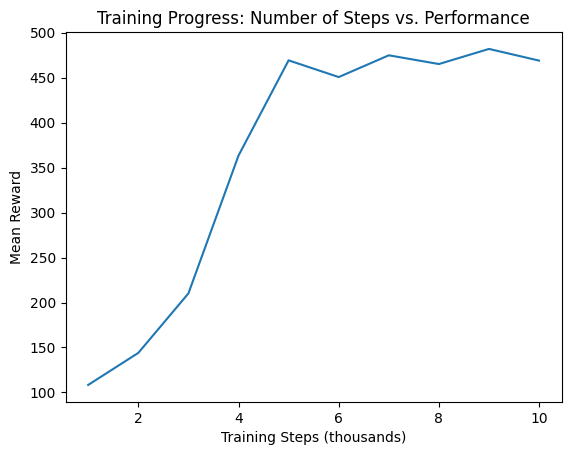

In [ ]:
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# Create environment
train_env = gym.make("CartPole-v1")

# Create PPO model
model = PPO(
    policy="MlpPolicy",
    env=train_env,
    learning_rate=1e-4,
    batch_size=32,
    gamma=0.99,
    verbose=1,
    n_steps=2048,  # Increase steps per update for better stability
    ent_coef=0.01,  # Entropy coefficient to encourage exploration
    clip_range=0.2,  # PPO clip range to control the magnitude of policy updates
)

# Store training performance (rewards)
train_rewards = []

# Training loop
timesteps = 0
total_timesteps = 10000  # Total number of timesteps
print_interval = 1000  # Print every 5000 timesteps

while timesteps < total_timesteps:
    model.learn(total_timesteps=1000)  # Training step
    timesteps += 1000

    # Only print every 'print_interval' timesteps
    if timesteps % print_interval == 0:
        mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
        train_rewards.append(mean_reward)
        print(f"Training step {timesteps}: Mean reward = {mean_reward} ± {std_reward}")

# Plot training performance
plt.plot(range(1, len(train_rewards) + 1), train_rewards)
plt.xlabel("Training Steps (thousands)")
plt.ylabel("Mean Reward")
plt.title("Training Progress: Number of Steps vs. Performance")
plt.show()


In [ ]:
# 建立錄影用環境
video_folder = "./videos/"
os.makedirs(video_folder, exist_ok=True)

# 建立測試環境並錄影
test_env = gym.make("CartPole-v1", render_mode="rgb_array")
test_env = RecordVideo(
    test_env,
    video_folder=video_folder,
    episode_trigger=lambda e: True  # 每個 episode 都錄
)

# 使用訓練好的模型執行幾個回合
episodes = 3
for ep in range(episodes):
    obs, info = test_env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = test_env.step(action)

test_env.close()
print("測試並錄影完成，請查看 videos 資料夾。")


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1.mp4
Moviepy - Building video /content/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-2.mp4
測試並錄影完成，請查看 videos 資料夾。


# Experiment 1 - Sparse vs. Dense Reward

Epoch 30/30 (Sparse): 100%|██████████| 1000/1000 [00:04<00:00, 222.35it/s]


Moviepy - Building video /content/video_dense/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video_dense/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video_dense/rl-video-episode-0.mp4
Moviepy - Building video /content/video_sparse/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video_sparse/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video_sparse/rl-video-episode-0.mp4
[+] Saved merged video to: comparison_dense_vs_sparse.mp4


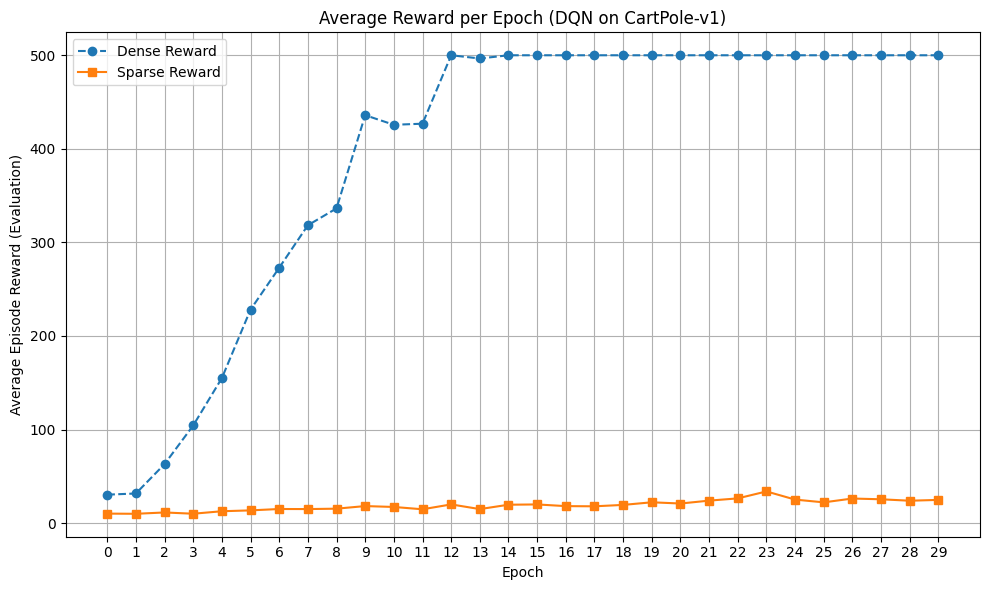

In [ ]:
!pip install tqdm

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import os
import shutil
import cv2

# === Sparse Reward Wrapper ===
class SparseRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.total_reward = 0

    def reset(self, **kwargs):
        self.total_reward = 0
        return self.env.reset(**kwargs)

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.total_reward += reward
        if terminated or truncated:
            # reward = 1 if self.total_reward >= 10 else 0
            reward = self.total_reward / 2.0
        else:
            reward = 0
        return obs, reward, terminated, truncated, info

# === DQN Training Function ===
def train_PPO_with_epochs(env_id, model_cls, is_sparse, n_epochs=30, step_per_epoch=1000, seed=42):
    if is_sparse:
        env = SparseRewardWrapper(gym.make(env_id))
        log_dir = "./log_sparse"
    else:
        env = gym.make(env_id)
        log_dir = "./log_dense"

    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)

    env = Monitor(env, log_dir)

    model = model_cls("MlpPolicy", env, verbose=0, seed=seed)
    reward_history = []

    for epoch in range(n_epochs):
        with tqdm(total=step_per_epoch, desc=f"Epoch {epoch+1}/{n_epochs} ({'Sparse' if is_sparse else 'Dense'})") as pbar:
            model.learn(total_timesteps=step_per_epoch, reset_num_timesteps=False)
            pbar.update(step_per_epoch)

        run_evaluation(model, log_dir, is_sparse=is_sparse, num_episodes=20)
        rewards = extract_rewards(log_dir)
        reward_history.append(rewards.copy())

    return model, log_dir, reward_history



# === Run evaluation episodes to trigger monitor.csv ===
def run_evaluation(model, log_dir, is_sparse, num_episodes=20):
    env = gym.make("CartPole-v1")
    if is_sparse:
        env = SparseRewardWrapper(env)
    env = Monitor(env, log_dir)
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    env.close()

# === Record agent video ===
def record_video(model, env_id, is_sparse, video_folder):
    if os.path.exists(video_folder):
        shutil.rmtree(video_folder)
    env = gym.make(env_id, render_mode="rgb_array")
    if is_sparse:
        env = SparseRewardWrapper(env)
    env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda e: True)
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    env.close()

# === Combine two videos side-by-side with labels ===
def merge_videos(video1_path, video2_path, output_path):
    cap1 = cv2.VideoCapture(video1_path)
    cap2 = cv2.VideoCapture(video2_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    width = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap1.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter(output_path, fourcc, fps, (width * 2, height))

    font = cv2.FONT_HERSHEY_DUPLEX
    font_scale = 1.2
    font_color = (0, 0, 0)      # 🖤 Black text
    thickness = 3
    pos1 = (30, 60)
    pos2 = (30, 60)

    while cap1.isOpened() and cap2.isOpened():
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()
        if not ret1 or not ret2:
            break

        # Optional: Add background box for better contrast (optional)
        # cv2.rectangle(frame1, (20, 20), (300, 80), (255, 255, 255), -1)
        # cv2.rectangle(frame2, (20, 20), (300, 80), (255, 255, 255), -1)

        # Add black label
        cv2.putText(frame1, "Dense Reward", pos1, font, font_scale, font_color, thickness, cv2.LINE_AA)
        cv2.putText(frame2, "Sparse Reward", pos2, font, font_scale, font_color, thickness, cv2.LINE_AA)

        combined = np.hstack((frame1, frame2))
        out.write(combined)

    cap1.release()
    cap2.release()
    out.release()
    print(f"[+] Saved merged video to: {output_path}")



# === Extract reward learning curve from monitor file ===
def extract_rewards(monitor_dir):
    rewards = []
    monitor_files = [f for f in os.listdir(monitor_dir) if "monitor" in f and f.endswith(".csv")]
    if not monitor_files:
        raise FileNotFoundError("No monitor CSV found in directory.")

    monitor_path = os.path.join(monitor_dir, monitor_files[0])
    with open(monitor_path) as f:
        for line in f:
            if line.startswith("#") or line.startswith("r"):  # skip comment/header
                continue
            try:
                reward = float(line.strip().split(',')[0])
                rewards.append(reward)
            except ValueError:
                continue  # skip lines that still fail
    return rewards


# === Main Execution ===
env_id = "CartPole-v1"
model_dense, log_dense, rewards_dense_epochs = train_PPO_with_epochs(env_id, PPO, is_sparse=False)
model_sparse, log_sparse, rewards_sparse_epochs = train_PPO_with_epochs(env_id, PPO, is_sparse=True)



# Run evaluation episodes to generate monitor.csv
run_evaluation(model_dense, log_dense, is_sparse=False)
run_evaluation(model_sparse, log_sparse, is_sparse=True)

# Record videos
record_video(model_dense, env_id, is_sparse=False, video_folder="./video_dense")
record_video(model_sparse, env_id, is_sparse=True, video_folder="./video_sparse")

# Merge videos
dense_mp4 = sorted([f for f in os.listdir("./video_dense") if f.endswith(".mp4")])[0]
sparse_mp4 = sorted([f for f in os.listdir("./video_sparse") if f.endswith(".mp4")])[0]
merge_videos(
    os.path.join("./video_dense", dense_mp4),
    os.path.join("./video_sparse", sparse_mp4),
    "comparison_dense_vs_sparse.mp4"
)

# Plot learning curves
# === Plot average reward per epoch ===
avg_dense = [np.mean(rews) if rews else 0 for rews in rewards_dense_epochs]
avg_sparse = [np.mean(rews) if rews else 0 for rews in rewards_sparse_epochs]

plt.figure(figsize=(10,6))
plt.plot(avg_dense, marker='o', label="Dense Reward", linestyle='--')
plt.plot(avg_sparse, marker='s', label="Sparse Reward")
plt.xlabel("Epoch")
plt.ylabel("Average Episode Reward (Evaluation)")
plt.title("Average Reward per Epoch (DQN on CartPole-v1)")
plt.xticks(range(len(avg_dense)))  # 確保每個 epoch 都標上去
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("learning_curve_avg_epoch.png")
plt.show()




# Experiment 2 - Sparse vs. Sparse + Intrinsic Reward

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install gymnasium[classic_control]

# ✅ 最終整合修正版本：包含 monitor.csv 寫入修正與錯誤提示，儲存到 Google Drive

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import os, shutil

# === Sparse Reward
class SparseRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.total_reward = 0
    def reset(self, **kwargs):
        self.total_reward = 0
        return self.env.reset(**kwargs)
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.total_reward += reward
        if terminated or truncated:
            reward = self.total_reward / 2.0
        else:
            reward = 0
        return obs, reward, terminated, truncated, info

# === Sparse + Intrinsic Reward
class SparseIntrinsicRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.visited = set()
        self.total_reward = 0
    def reset(self, **kwargs):
        self.visited.clear()
        self.total_reward = 0
        return self.env.reset(**kwargs)
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        obs_key = tuple(np.round(obs, 1))
        intrinsic_reward = 1.0 if obs_key not in self.visited else 0.0
        self.visited.add(obs_key)
        self.total_reward += reward
        if terminated or truncated:
            reward = self.total_reward / 2.0
        else:
            reward = 0
        return obs, reward + intrinsic_reward, terminated, truncated, info

# === Evaluation with forced monitor log
def run_evaluation(model, log_dir, wrapped_env_fn, num_episodes=20):
    filename = os.path.join(log_dir, "monitor.csv")
    env = Monitor(wrapped_env_fn(), filename=filename)
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    env.close()

# === Extract rewards from monitor
def extract_rewards(monitor_dir):
    rewards = []
    files = [f for f in os.listdir(monitor_dir) if "monitor" in f and f.endswith(".csv")]
    if not files:
        raise FileNotFoundError(f"No monitor CSV found in: {monitor_dir}")
    with open(os.path.join(monitor_dir, files[0])) as f:
        for line in f:
            if line.startswith("#") or line.startswith("r"): continue
            try: rewards.append(float(line.strip().split(',')[0]))
            except: continue
    return rewards

# === Train PPO
def train_ppo(env_fn, log_dir, n_epochs=30, step_per_epoch=1000):
    if os.path.exists(log_dir): shutil.rmtree(log_dir)
    os.makedirs(log_dir)
    env = Monitor(env_fn())
    model = PPO("MlpPolicy", env, verbose=0)
    reward_history = []
    for epoch in range(n_epochs):
        with tqdm(total=step_per_epoch, desc=f"Epoch {epoch+1}/{n_epochs} ({log_dir})") as pbar:
            model.learn(total_timesteps=step_per_epoch, reset_num_timesteps=False)
            pbar.update(step_per_epoch)
        run_evaluation(model, log_dir, env_fn, num_episodes=20)
        rewards = extract_rewards(log_dir)
        reward_history.append(rewards.copy())
    return model, reward_history

# === Record one episode
def record_video(model, env_fn, video_dir="./video", label="agent"):
    if os.path.exists(video_dir): shutil.rmtree(video_dir)
    os.makedirs(video_dir, exist_ok=True)
    env = env_fn()
    env = RecordVideo(env, video_folder=video_dir, episode_trigger=lambda x: True)
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    env.close()
    video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]
    return os.path.join(video_dir, video_files[0]) if video_files else None

# === Define environments
env_id = "CartPole-v1"
def make_sparse(): return SparseRewardWrapper(gym.make(env_id))
def make_sparse_intrinsic(): return SparseIntrinsicRewardWrapper(gym.make(env_id))

# === Train models
model_sparse, rewards_sparse = train_ppo(make_sparse, "./log_sparse")
model_intrinsic, rewards_intrinsic = train_ppo(make_sparse_intrinsic, "./log_intrinsic")

# === Record videos
video_sparse = record_video(model_sparse, make_sparse, "./video_sparse", "Sparse")
video_intrinsic = record_video(model_intrinsic, make_sparse_intrinsic, "./video_intrinsic", "Sparse + Intrinsic")

# === Plot learning curves
avg_sparse = [np.mean(r) for r in rewards_sparse]
avg_intrin = [np.mean(r) for r in rewards_intrinsic]

plt.figure(figsize=(10,6))
plt.plot(avg_sparse, label="Sparse Reward", marker='o')
plt.plot(avg_intrin, label="Sparse + Intrinsic Reward", marker='^')
plt.xlabel("Epoch")
plt.ylabel("Average Episode Reward")
plt.title("PPO: Sparse vs. Sparse + Intrinsic (count-based)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plot_path = "ppo_sparse_vs_intrinsic.png"
plt.savefig(plot_path)
plt.show()

# === Save to Google Drive
drive_path = "/content/drive/MyDrive/資訊工程學習資料/Artificial Intelligence Capstone/Project #2"
os.makedirs(drive_path, exist_ok=True)

video_sparse_dst = os.path.join(drive_path, "video_sparse.mp4")
video_intrin_dst = os.path.join(drive_path, "video_intrinsic.mp4")
plot_dst = os.path.join(drive_path, "ppo_sparse_vs_intrinsic.png")

shutil.copy(plot_path, plot_dst)
shutil.copy(video_sparse, video_sparse_dst)
shutil.copy(video_intrinsic, video_intrin_dst)

plot_dst, video_sparse_dst, video_intrin_dst


Epoch 11/30 (./log_sparse):   0%|          | 0/1000 [00:00<?, ?it/s]

# Experiment 3 - Intrinsic Reward Scaling

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


ValueError: Mountpoint must not already contain files

rm: cannot remove '/content/drive/MyDrive': Operation canceled
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 30/30 (./log_intrinsic_alpha5.0): 100%|██████████| 1000/1000 [00:04<00:00, 237.59it/s]


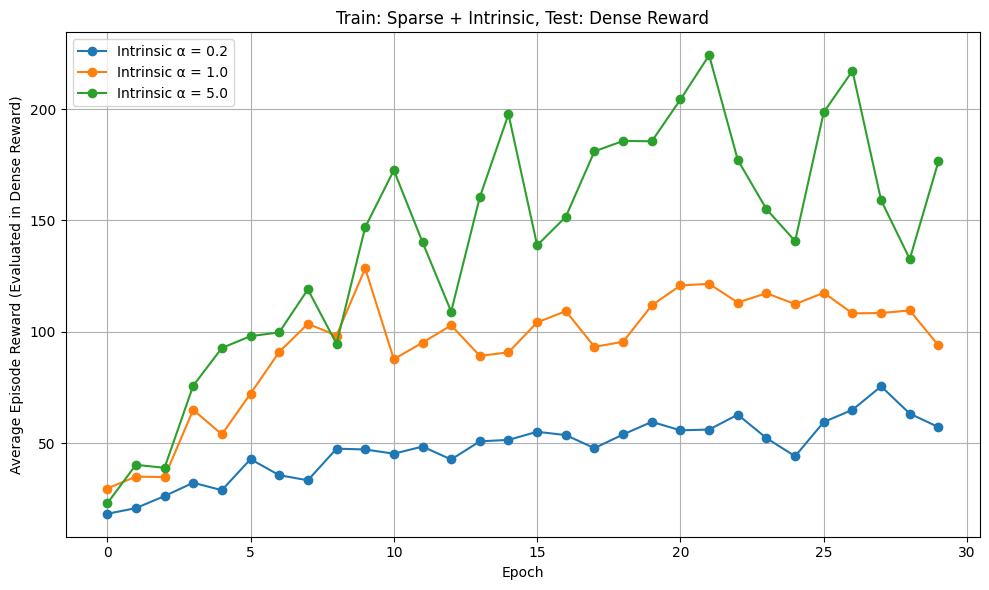

In [11]:
# 0. Install dependencies
!pip install tqdm

# 1. Clear existing files in /content/drive and mount Google Drive
!rm -rf /content/drive/*
from google.colab import drive
drive.mount('/content/drive')

# 2. Your original code starts here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import os, shutil

# === Sparse + Intrinsic Reward Wrapper ===
class SparseIntrinsicRewardWrapper(gym.Wrapper):
    def __init__(self, env, alpha=1.0):
        super().__init__(env)
        self.alpha = alpha
        self.visited = set()
        self.total_reward = 0

    def reset(self, **kwargs):
        self.visited.clear()
        self.total_reward = 0
        return self.env.reset(**kwargs)

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        obs_key = tuple(np.round(obs, 1))
        intrinsic_reward = self.alpha if obs_key not in self.visited else 0.0
        self.visited.add(obs_key)
        self.total_reward += reward
        if terminated or truncated:
            reward = self.total_reward / 2.0
        else:
            reward = 0
        return obs, reward + intrinsic_reward, terminated, truncated, info

# === Dense reward evaluation (original CartPole) ===
def make_dense():
    return lambda: gym.make("CartPole-v1", render_mode="rgb_array")

# === Sparse + Intrinsic training environment ===
def make_sparse_intrinsic(alpha=1.0):
    return lambda: SparseIntrinsicRewardWrapper(
        gym.make("CartPole-v1", render_mode="rgb_array"), alpha=alpha
    )

# === Evaluation on dense reward environment ===
def run_evaluation(model, log_dir, env_fn, num_episodes=20):
    filename = os.path.join(log_dir, "monitor.csv")
    env = Monitor(env_fn(), filename=filename)
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    env.close()

# === Read rewards from monitor.csv ===
def extract_rewards(monitor_dir):
    rewards = []
    files = [f for f in os.listdir(monitor_dir) if "monitor" in f and f.endswith(".csv")]
    if not files:
        raise FileNotFoundError(f"No monitor CSV found in: {monitor_dir}")
    with open(os.path.join(monitor_dir, files[0])) as f:
        for line in f:
            if line.startswith("#") or line.startswith("r"):
                continue
            try:
                rewards.append(float(line.strip().split(',')[0]))
            except:
                continue
    return rewards

# === PPO training function ===
def train_ppo(env_fn_train, log_dir, n_epochs=30, step_per_epoch=1000):
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir)
    env = Monitor(env_fn_train())
    model = PPO("MlpPolicy", env, verbose=0)
    reward_history = []
    for epoch in range(n_epochs):
        with tqdm(total=step_per_epoch, desc=f"Epoch {epoch+1}/{n_epochs} ({log_dir})") as pbar:
            model.learn(total_timesteps=step_per_epoch, reset_num_timesteps=False)
            pbar.update(step_per_epoch)
        # 評估階段使用 dense reward 環境
        run_evaluation(model, log_dir, make_dense(), num_episodes=20)
        rewards = extract_rewards(log_dir)
        reward_history.append(rewards.copy())
    return model, reward_history

# === Record video on dense reward env ===
def record_video(model, video_dir="./video"):
    if os.path.exists(video_dir):
        shutil.rmtree(video_dir)
    os.makedirs(video_dir, exist_ok=True)
    env = RecordVideo(make_dense()(), video_folder=video_dir, episode_trigger=lambda x: True)
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    env.close()
    video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]
    return os.path.join(video_dir, video_files[0]) if video_files else None

# === Train with different intrinsic reward strength ===
alphas = [0.2, 1.0, 5.0]
reward_histories = {}
models = {}

for alpha in alphas:
    log_dir = f"./log_intrinsic_alpha{alpha}"
    model, rewards = train_ppo(make_sparse_intrinsic(alpha), log_dir)
    reward_histories[alpha] = rewards
    models[alpha] = model

# === Plot learning curves (dense reward as y-axis) ===
plt.figure(figsize=(10,6))
for alpha in alphas:
    avg_rewards = [np.mean(r) for r in reward_histories[alpha]]
    plt.plot(avg_rewards, label=f"Intrinsic α = {alpha}", marker='o')

plt.xlabel("Epoch")
plt.ylabel("Average Episode Reward (Evaluated in Dense Reward)")
plt.title("Train: Sparse + Intrinsic, Test: Dense Reward")
plt.grid(True)
plt.legend()
plt.tight_layout()
plot_path = "ppo_sparse_intrinsic_vs_dense_eval.png"
plt.savefig(plot_path)
plt.show()

# === Record and save videos for each α ===
video_paths = {}
for alpha in alphas:
    video_dir = f"./video_intrinsic_alpha{alpha}"
    video_paths[alpha] = record_video(models[alpha], video_dir)

# === Save to Google Drive Exp3 ===
drive_path = "/content/drive/MyDrive/資訊工程學習資料/Artificial Intelligence Capstone/Project #2/Exp3"
os.makedirs(drive_path, exist_ok=True)

# 儲存圖表
shutil.copy(plot_path, os.path.join(drive_path, "ppo_sparse_intrinsic_vs_dense_eval.png"))

# 儲存每個 α 的影片
for alpha, src in video_paths.items():
    dst = os.path.join(drive_path, f"video_intrinsic_alpha{alpha}.mp4")
    shutil.copy(src, dst)


# Experiment 4 - PPO Clip

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Experiment 4 – PPO Clipping Range Comparison with automatic Google Drive saving.
"""

# To install required packages:
# pip install gymnasium[classic_control] stable-baselines3 tqdm matplotlib

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import os
import shutil

# === Evaluation with forced monitor log ===
def run_evaluation(model, log_dir, wrapped_env_fn, num_episodes=20):
    filename = os.path.join(log_dir, "monitor.csv")
    env = Monitor(wrapped_env_fn(), filename=filename)
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    env.close()

# === Extract rewards from monitor ===
def extract_rewards(monitor_dir):
    rewards = []
    files = [f for f in os.listdir(monitor_dir) if "monitor" in f and f.endswith(".csv")]
    if not files:
        raise FileNotFoundError(f"No monitor CSV found in: {monitor_dir}")
    with open(os.path.join(monitor_dir, files[0])) as f:
        for line in f:
            if line.startswith("#") or line.startswith("r"):
                continue
            try:
                rewards.append(float(line.strip().split(',')[0]))
            except:
                continue
    return rewards

# === Train PPO ===
def train_ppo(env_fn, log_dir, clip_range=0.2, n_epochs=30, step_per_epoch=1000):
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)
    env = Monitor(env_fn())
    model = PPO("MlpPolicy", env,
                learning_rate=3e-4,
                clip_range=clip_range,
                verbose=0)
    reward_history = []
    for epoch in range(n_epochs):
        with tqdm(total=step_per_epoch, desc=f"Epoch {epoch+1}/{n_epochs} ({log_dir})") as pbar:
            model.learn(total_timesteps=step_per_epoch, reset_num_timesteps=False)
            pbar.update(step_per_epoch)
        run_evaluation(model, log_dir, env_fn, num_episodes=20)
        rewards = extract_rewards(log_dir)
        reward_history.append(rewards.copy())
    return model, reward_history

# === Record one episode ===
def record_video(model, env_fn, video_dir="./video"):
    if os.path.exists(video_dir):
        shutil.rmtree(video_dir)
    os.makedirs(video_dir, exist_ok=True)
    env = env_fn()
    env = RecordVideo(env, video_folder=video_dir, episode_trigger=lambda x: True)
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    env.close()
    video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]
    return os.path.join(video_dir, video_files[0]) if video_files else None

def main():
    # Define environment
    env_id = "CartPole-v1"
    def make_env():
        return gym.make(env_id, render_mode="rgb_array")

    # Train models with different clip ranges
    clip_settings = [0.2, 0.1, 0.05]
    models = {}
    rewards = {}

    for clip in clip_settings:
        log_dir = f"./log_clip_{clip}"
        model, hist = train_ppo(make_env, log_dir, clip_range=clip)
        models[clip] = model
        rewards[clip] = hist

    # Record videos
    video_files = {}
    for clip, model in models.items():
        video_files[clip] = record_video(model, make_env, video_dir=f"./video_clip_{clip}")

    # Plot learning curves
    plt.figure(figsize=(10,6))
    for clip in clip_settings:
        avg = [np.mean(r) for r in rewards[clip]]
        plt.plot(avg, label=f"PPO clip={clip}", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Average Episode Reward")
    plt.title("PPO: Clipping Range Comparison")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plot_path = "ppo_clip_comparison.png"
    plt.savefig(plot_path)
    plt.show()

    # Copy plot and videos to Google Drive
    drive_path = "/content/drive/MyDrive/資訊工程學習資料/Artificial Intelligence Capstone/Project #2/Exp4"
    os.makedirs(drive_path, exist_ok=True)
    shutil.copy(plot_path, os.path.join(drive_path, "ppo_clip_comparison.png"))

    for clip, src in video_files.items():
        if src and os.path.isfile(src):
            dst_name = f"video_clip_{clip}.mp4"
            shutil.copy(src, os.path.join(drive_path, dst_name))
        else:
            print(f"Warning: video for clip={clip} not found at {src}")

if __name__ == "__main__":
    main()


Epoch 11/30 (./log_clip_0.2): 100%|██████████| 1000/1000 [00:03<00:00, 250.66it/s]


KeyboardInterrupt: 

# Experiment 5

In [ ]:

# === Colab 安裝 Atari 環境與 Stable-Baselines3 ===
!pip install -q gym[atari] stable-baselines3[extra] autorom
!AutoROM --accept-license


AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.


In [ ]:
import os
os.environ["ALE_ROM_DIR"] = "/usr/local/lib/python3.11/dist-packages/AutoROM/roms"
import IPython
IPython.display.display(IPython.display.HTML("<b>✅ 請重新啟動執行階段以完成安裝</b>"))
import gym

env_list = gym.envs.registry.keys()
atari_envs = [env_id for env_id in env_list if "v5" in env_id or "Atari" in env_id]

for i, env_id in enumerate(atari_envs[:20]):
    print(f"{i+1}. {env_id}")



1. ALE/Adventure-v5
2. ALE/Adventure-ram-v5
3. ALE/AirRaid-v5
4. ALE/AirRaid-ram-v5
5. ALE/Alien-v5
6. ALE/Alien-ram-v5
7. ALE/Amidar-v5
8. ALE/Amidar-ram-v5
9. ALE/Assault-v5
10. ALE/Assault-ram-v5
11. ALE/Asterix-v5
12. ALE/Asterix-ram-v5
13. ALE/Asteroids-v5
14. ALE/Asteroids-ram-v5
15. ALE/Atlantis-v5
16. ALE/Atlantis-ram-v5
17. ALE/Atlantis2-v5
18. ALE/Atlantis2-ram-v5
19. ALE/Backgammon-v5
20. ALE/Backgammon-ram-v5


[a2c] Training: 100%|██████████| 400000/400000 [37:31<00:00, 177.65it/s]


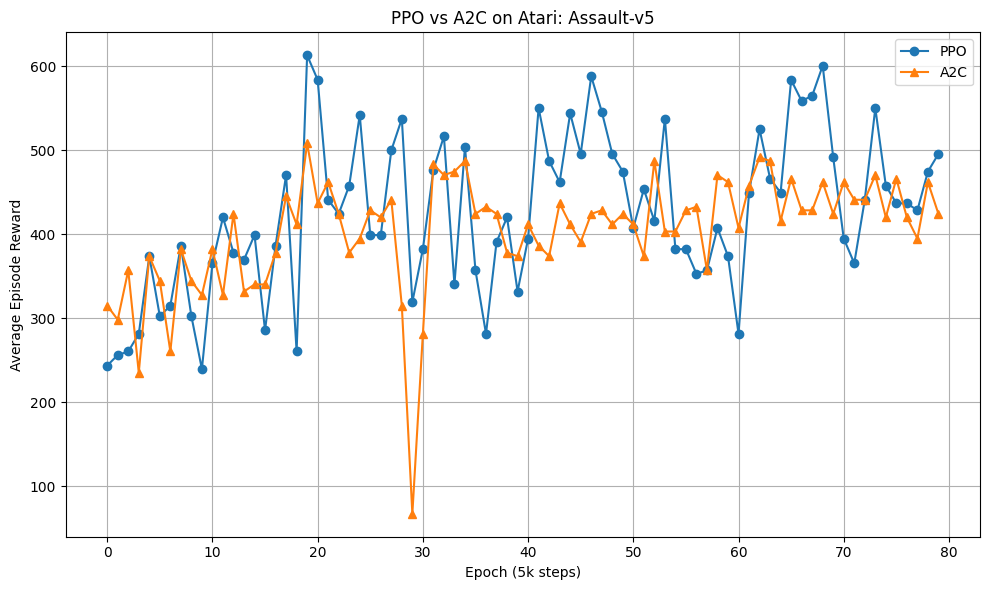

Moviepy - Building video /content/video_ppo/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video_ppo/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video_ppo/rl-video-episode-0.mp4
Moviepy - Building video /content/video_a2c/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video_a2c/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video_a2c/rl-video-episode-0.mp4


'/content/drive/MyDrive/資訊工程學習資料/Artificial Intelligence Capstone/Project #2/Exp5/video_a2c_assault.mp4'

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import RecordVideo
from tqdm import tqdm
import shutil

# === Define Atari Environment ===
env_id = "ALE/Assault-v5"
def make_env(render=False):
    render_mode = "rgb_array" if render else None
    return lambda: Monitor(gym.make(env_id, render_mode=render_mode))

# === Evaluate Agent on Dense Reward ===
def run_evaluation(model, log_dir, env_fn, num_episodes=5):
    filename = f"{log_dir}/monitor.csv"
    env = Monitor(env_fn(), filename=filename)
    for _ in range(num_episodes):
        obs, _ = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    env.close()

def extract_rewards(monitor_dir):
    rewards = []
    files = [f for f in os.listdir(monitor_dir) if "monitor" in f and f.endswith(".csv")]
    with open(os.path.join(monitor_dir, files[0])) as f:
        for line in f:
            if line.startswith("#") or line.startswith("r"): continue
            try: rewards.append(float(line.strip().split(',')[0]))
            except: continue
    return rewards

# === Training Function ===

def train_agent(algo_cls, algo_name, total_timesteps=400000, eval_every=5000):
    log_dir = f"./log_{algo_name}"
    shutil.rmtree(log_dir, ignore_errors=True)
    os.makedirs(log_dir, exist_ok=True)

    model = algo_cls("CnnPolicy", make_env()(), verbose=0)
    reward_history = []

    # ★ 新增 tqdm 進度條
    with tqdm(total=total_timesteps, desc=f"[{algo_name}] Training") as pbar:
        for step in range(0, total_timesteps, eval_every):
            # 學習 eval_every 步
            model.learn(total_timesteps=eval_every, reset_num_timesteps=False)
            pbar.update(eval_every)            # 更新進度條

            # 評估並記錄 reward
            run_evaluation(model, log_dir, make_env(), num_episodes=5)
            rewards = extract_rewards(log_dir)
            reward_history.append(np.mean(rewards))

    return model, reward_history


# === Record Video
def record_video(model, video_dir="./video"):
    shutil.rmtree(video_dir, ignore_errors=True)
    os.makedirs(video_dir, exist_ok=True)
    env = RecordVideo(make_env(render=True)(), video_folder=video_dir, episode_trigger=lambda x: True)
    obs, _ = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    env.close()
    video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]
    return os.path.join(video_dir, video_files[0]) if video_files else None
ppo_model, ppo_rewards = train_agent(PPO, "ppo", total_timesteps=400000)
a2c_model, a2c_rewards = train_agent(A2C, "a2c", total_timesteps=400000)

# Plot
plt.figure(figsize=(10,6))
plt.plot(ppo_rewards, label="PPO", marker='o')
plt.plot(a2c_rewards, label="A2C", marker='^')
plt.xlabel("Epoch (5k steps)")
plt.ylabel("Average Episode Reward")
plt.title("PPO vs A2C on Atari: Assault-v5")
plt.grid(True)
plt.legend()
plt.tight_layout()
plot_path = "ppo_vs_a2c_assault.png"
plt.savefig(plot_path)
plt.show()

# Record videos
video_ppo = record_video(ppo_model, "./video_ppo")
video_a2c = record_video(a2c_model, "./video_a2c")

# Save to Google Drive (optional)
drive_path = "/content/drive/MyDrive/資訊工程學習資料/Artificial Intelligence Capstone/Project #2/Exp5"
os.makedirs(drive_path, exist_ok=True)
shutil.copy(plot_path, os.path.join(drive_path, "ppo_vs_a2c_assault.png"))
shutil.copy(video_ppo, os.path.join(drive_path, "video_ppo_assault.mp4"))
shutil.copy(video_a2c, os.path.join(drive_path, "video_a2c_assault.mp4"))
